# Лабораторне заняття №7

# Перетворення випадкових величин
На цьому занятті ми реалізуємо перетворення випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

Справедливі два твердження про квантильне перетворення:
1. Нехай випадкова величина $\xi$ має неперервну функцію розподілу $F$.
Тоді випадкова величина $\eta = F(\xi)$ має стандартний рівномірний розподіл:
$F(\xi) \sim Unif(0, 1)$.
2. Нехай $F$ - неперервна функція розподілу,
випадкова величина $\eta$ має стандартний рівномірний розподіл: $\eta \sim Unif(0, 1)$.
Тоді випадкова величина $\xi = F^{-1}(\eta)$ має функцію розподілу $F$.

### 1.1 Експоненційний розподіл

Реалізуйте перше твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з функцією розподілу $F$:
- згенеруйте $n = 10000$ значень випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте щільність стандартного рівномірного розподілу на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

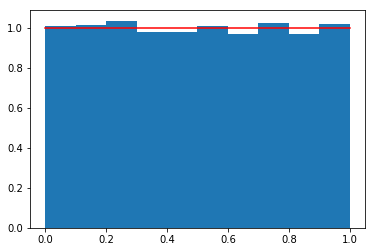

In [19]:
# Місце для Вашого коду
from scipy.stats import expon, uniform
xi=expon()
eta=uniform()
xi_rvs=xi.rvs(10000)
f_xi_rvs=xi.cdf(xi_rvs)
plt.hist(f_xi_rvs, normed=True)
x=np.arange(0, 1.01, 0.01)
y=eta.pdf(x)
plt.plot(x, y, 'r')
plt.show()

Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з функцією розподілу $F$:
- згенеруйте $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- обчисліть функцію обернену до функції розподілу випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

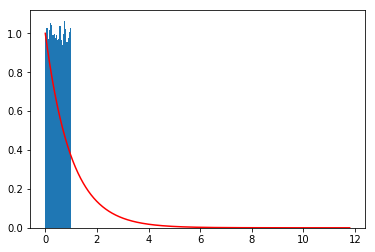

In [20]:
# Місце для Вашого коду
#$$F(x)=1-\exp\{-x}$$
#$$y=1-exp(-x)$$
#F^(-1)(y)=x=-log(1-y)

xi=expon()
eta=uniform()
eta_rvs=eta.rvs(10000)
f_eta_rvs=-np.log(1-eta_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')
x=np.arange(0, max(f_eta_rvs)+0.01, 0.01)
y=xi.pdf(x)
plt.plot(x, y, 'r')
plt.show()


### 1.2 Квантиль

Нехай $F$ - функція розпділу деякої випадкової величини $\xi$, $\alpha \in [0, 1]$.

Квантиль рівня $\alpha$ - це таке число $x_{\alpha}$, що
$$F \left(x_{\alpha}\right) = \mathsf{P}\left(\xi < x_{\alpha}\right) = \alpha.$$

Інший варіант визначення. Нехай $Q(\alpha)$ - це квантиль рівня $\alpha$. Тоді
$$Q(\alpha) = \inf \left\{ x \in \mathbb{R} \, \colon \, \alpha < F(x) \right\}.$$

Якщо $F$ - неперервна та строго зростає, то
$$Q = F^{-1}.$$

Для розподілів із класу **scipy.stats** функція квантилю реалізована методом **ppf**.

Наприклад, для експоненційного розподілу маємо (детальна інформація в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)):

In [21]:
from scipy.stats import expon

q = np.arange(0, 1.1, 0.1)
f_q = expon.ppf(q, loc=0, scale=1)
print(f_q)

qq = expon.cdf(f_q, loc=0, scale=1)
print(qq)

[0.         0.10536052 0.22314355 0.35667494 0.51082562 0.69314718
 0.91629073 1.2039728  1.60943791 2.30258509        inf]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Для випадкової величини $\xi \sim Exp(1)$ застосуйте метод **ppf** до згенерованих раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$.
Порівняйте ці значення з отриманими раніше $n = 10000$ значеннями випадкової величини $F^{-1}(\eta)$ за допомогою оберненої функції розподілу, яку Ви обчислювали.

**Зауваження.** В прикладі нижче:
- `xi` - це випадкова величина зі стандартного експоненційного розподілу ($\lambda = 1$);
- `eta_rvs` - $10000$ випадкових значень зі стандартного рівномірного розподілу;
- `f_eta_rvs` - значення оберненої до функції розподілу стандартного експоненційного розподілу в точках `eta_rvs`.

In [22]:
print(f_eta_rvs, xi.ppf(eta_rvs))
print("Number of different values = {}".format(sum(f_eta_rvs != xi.ppf(eta_rvs))))
print("Number of values that differ more than 10^{} = {}".format("{-10}", sum(f_eta_rvs - xi.ppf(eta_rvs) > 10**(-10))))

[0.58840298 0.49923123 0.45835462 ... 0.32858182 0.0876232  0.06277306] [0.58840298 0.49923123 0.45835462 ... 0.32858182 0.0876232  0.06277306]
Number of different values = 143
Number of values that differ more than 10^{-10} = 0


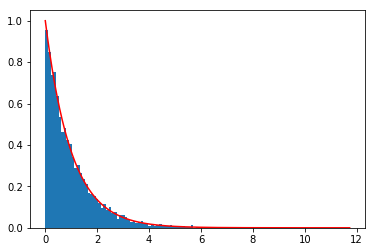

In [23]:
# Місце для Вашого коду
xi=expon()
eta=uniform()
xi_rvs=eta.rvs(10000)
f_xi_rvs=xi.ppf(xi_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')
x=np.arange(0, max(f_xi_rvs)+0.01, 0.01)
y=xi.pdf(x)
plt.plot(x, y, 'r')
plt.show()


Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з використанням вбудованого методу квантильної функції:
- візьміть згенеровані раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$ за допомогою методу **ppf**;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте даний графік з отриманим раніше.

In [24]:
# Місце для Вашого коду



## 2 Модуль від випадкової величини

### 2.1 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

# Місце для Вашого коду
from scipy.stats import norm
xi=norm()
#eta=uniform()



x=np.arange(-4, 4+0.01, 0.01)
y=xi.pdf(x)
rvs=xi.rvs(10000)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
f_rvs=np.abs(rvs)
def f(x):
    return[0 if el<0 else 2*xi.pdf(el) for el in x]
axs[1].hist(f_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
axs[1].plot(x, f(x), 'g')
plt.show()

### 2.2 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу на $[-1, 4]$.
Тобто $\xi \sim Unif(-1, 4)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

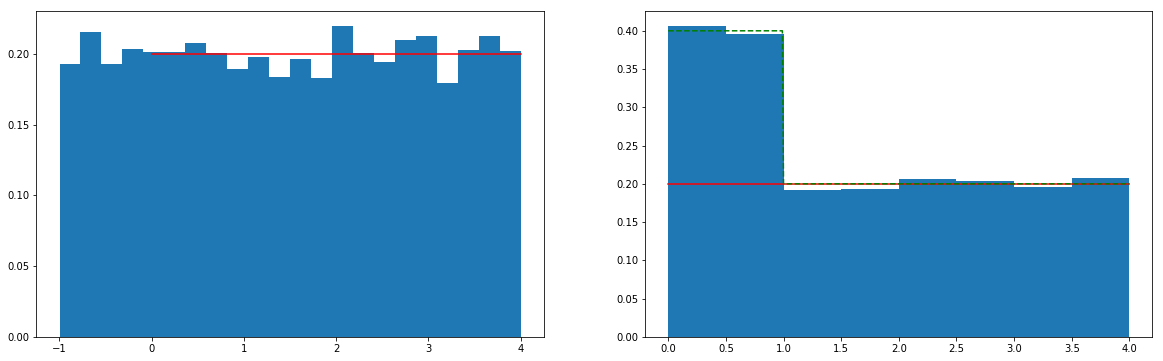

In [25]:
xi=uniform(loc=-1, scale=5)
x=np.arange(0, 4+0.01, 0.01)
y=xi.pdf(x)
rvs=xi.rvs(10000)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
f_rvs=np.abs(rvs)
def f(x):
    return[0 if el<0 else 2*xi.pdf(el)  if el<1 else xi.pdf(el) for el in x]
axs[1].hist(f_rvs, normed=True, bins=8)#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
axs[1].plot(x, f(x), 'g--')
plt.show()

# Місце для Вашого коду

# Місце для Вашого коду
xi=uniform(loc=-1, scale=5)
#eta=uniform()



x=np.arange(-5, 5+0.01, 0.01)
y=xi.pdf(x)
xi_rvs=xi.rvs(10000)
f_xi_rvs=np.abs(xi_rvs)
plt.hist(f_xi_rvs, normed=True, bins='auto')

#plt.plot(x, y, 'g')
plt.plot(x, f(x), 'r')

plt.show()


### 2.3 Експоненційний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi - 1|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi - 1|$.

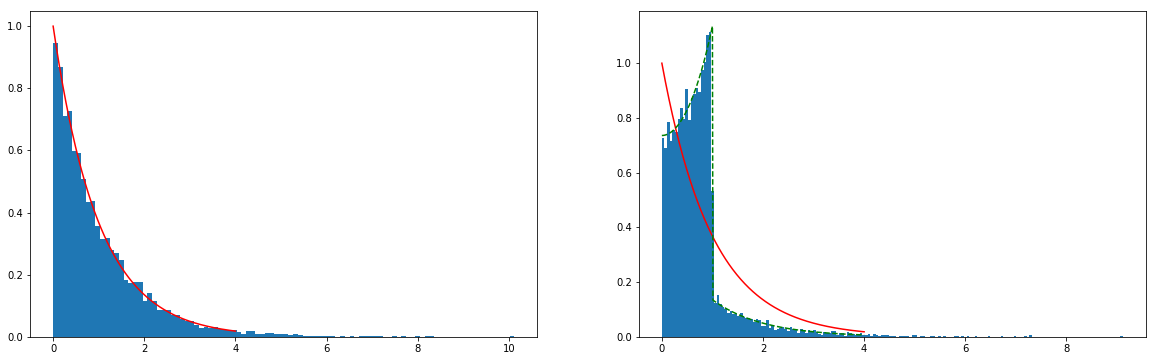

In [26]:
# Місце для Вашого коду
xi=expon()
x=np.arange(0, 4+0.01, 0.01)
y=xi.pdf(x)
rvs=xi.rvs(10000)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
f_rvs=np.abs(rvs-1)
def f(x):
    return[0 if el<0 else expon.pdf(el , loc=-1)+expon.pdf(-el , loc=-1) for el in x ]
axs[1].hist(f_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
axs[1].plot(x, f(x), 'g--')
plt.show()


## 3 Квадрат від випадкової величини

### 3.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$.

$$P(\xi \in A)=\int_{A}^{}f(x)dx$$
$$F_{\xi^2}(x)=P(\xi^2<x)=P(-\sqrt{x}<\xi<\sqrt{x})=\int_{-\sqrt{x}}^{\sqrt{x}}f(x)dx=\int_{0}^{\sqrt{x}}I[0,1](x)dx(x)$$

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


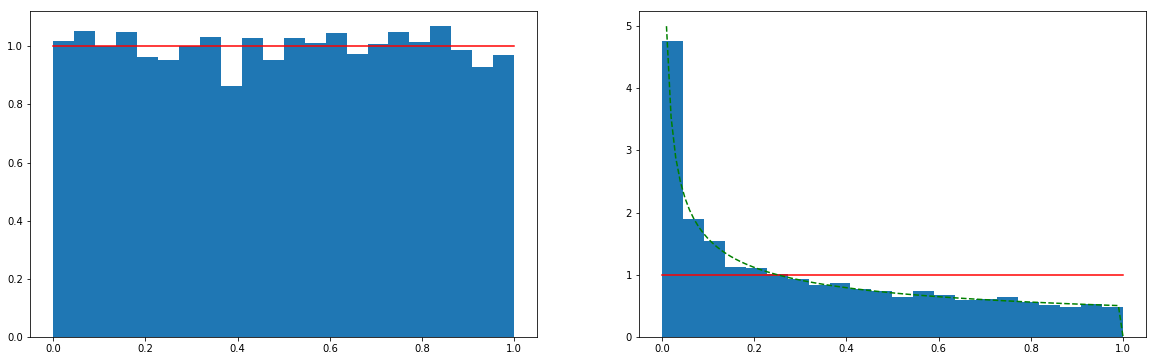

In [27]:
# Місце для Вашого коду
xi=uniform(loc=0, scale=1)
x=np.arange(0, 1+0.01, 0.01)
y=xi.pdf(x)
rvs=xi.rvs(10000)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
f_rvs=(rvs)**2
def f(x):
    return[0 if el<0 else 1/(2*np.sqrt(el))  if el<1 else 0 for el in x]
axs[1].hist(f_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
axs[1].plot(x, f(x), 'g--')
plt.show()


### 3.2 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\eta \sim \chi^2_1$;
   - функцію щільності випадкової величини $\eta \sim \Gamma(1/2, 1/2)$.
   

$$P(\xi \in A)=\int_{A}^{}f(x)dx$$
$$F_{\xi^2}(x)=P(\xi^2<x)=P(-\sqrt{x}<\xi<\sqrt{x})=\int_{-\sqrt{x}}^{\sqrt{x}}f(t)dt=\int_{-\sqrt{x}}^{\sqrt{x}}\frac{1}{\sqrt{2 \pi} \, } \exp \left\{ -\frac{(t)^2}{2 \,} \right\}dt=2\int_{0}^{\sqrt{x}}\frac{1}{\sqrt{2 \pi} \, } \exp \left\{ -\frac{(t)^2}{2 \,} \right\}dt$$
$$f_{\xi^2}(x)=\frac{1}{\sqrt{2x \pi} \, } \exp \left\{ -\frac{x}{2 \,} \right\}$$

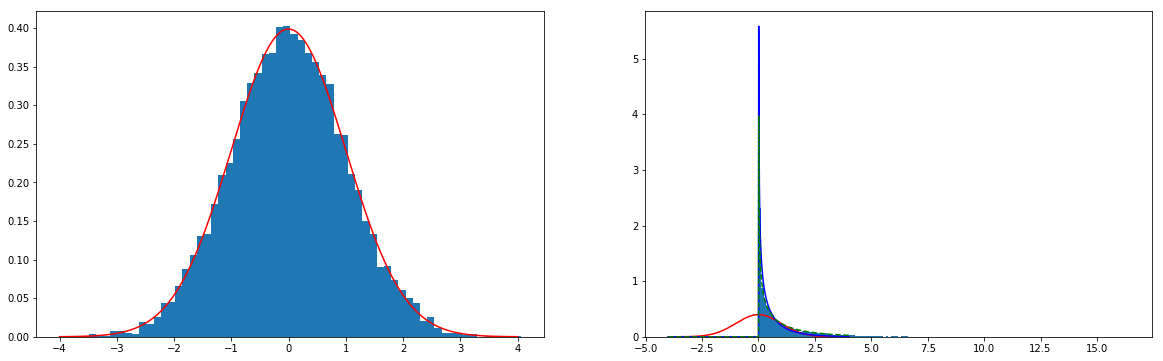

In [28]:
# Місце для Вашого коду

from scipy.stats import norm
from scipy.stats import gamma
xi=norm(loc=0, scale=1)
x=np.arange(-4, 4+0.01, 0.01)
y=xi.pdf(x)
rvs=xi.rvs(10000)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
f_rvs=(rvs)**2
def f(x):
    return[0 if el<0 else np.exp(-el/2)/(np.sqrt(2*np.pi*el)) for el in x]
eta=gamma(0.5, loc=0, scale=1)
y_eta=eta.pdf(x)
axs[1].hist(f_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
axs[1].plot(x, y_eta, 'b')
axs[1].plot(x, f(x), 'g--')
plt.show()


## 4 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) \geq 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$.

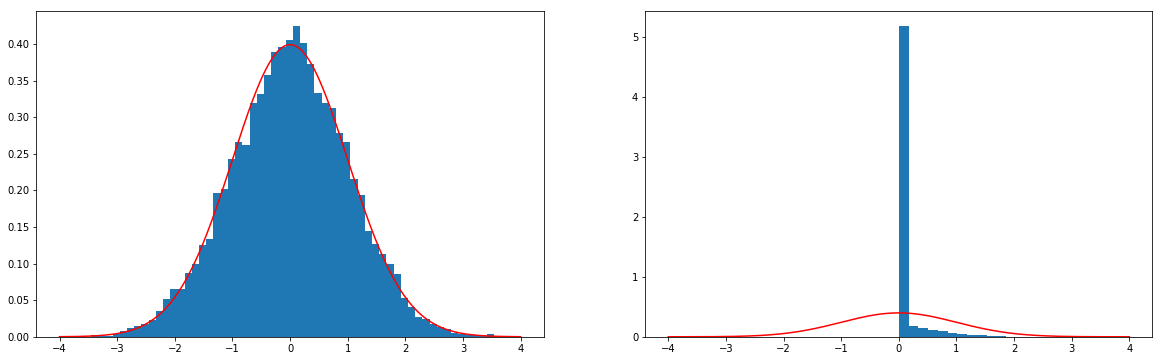

In [29]:
# Місце для Вашого коду

from scipy.stats import expon
xi=norm(loc=0, scale=1)
x=np.arange(-4, 4+0.01, 0.01)
x=np.arange(-4, 4+0.01, 0.01)
y=xi.pdf(x)
rvs=xi.rvs(10000)
#print(rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')

eta=(rvs-1>=0)*(rvs-1)
#print(eta)

axs[1].hist(eta, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
plt.show()



## 5 Одиничний квадрат

Реалізуйте випадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [30]:
# Місце для Вашого коду
x=uniform(loc=0, scale=1)
y=uniform(loc=0, scale=1)
x_rvs=x.rvs(100000)
y_rvs=y.rvs(100000)

Знайдіть функцію щільності випадкової величини $\xi_1 = x + y$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

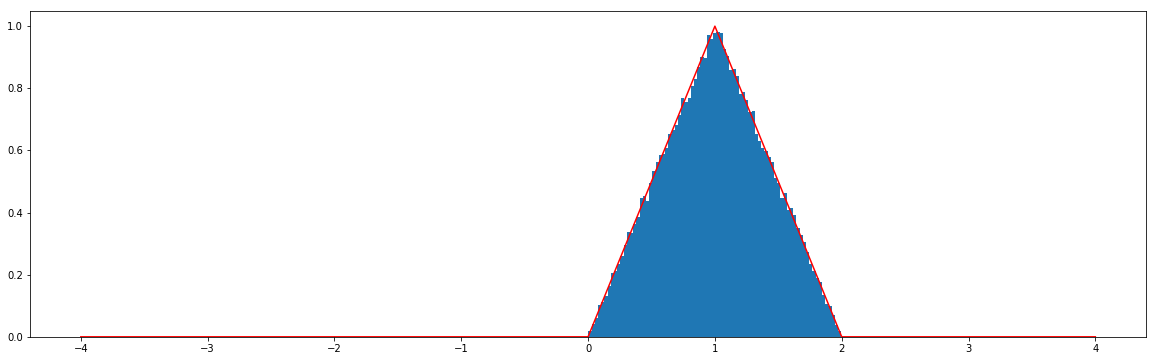

In [31]:
# Місце для Вашого коду
psi1_rvs=x_rvs+y_rvs
fig, axs=plt.subplots(1, 1, figsize=(20, 6))

    
x=np.arange(-4, 4+0.01, 0.01)
y=(x>-0)*(x<1)*x+(x>=1)*(x<=2)*(2-x)

axs.hist(psi1_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs.plot(x, y, 'r')
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = xy$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

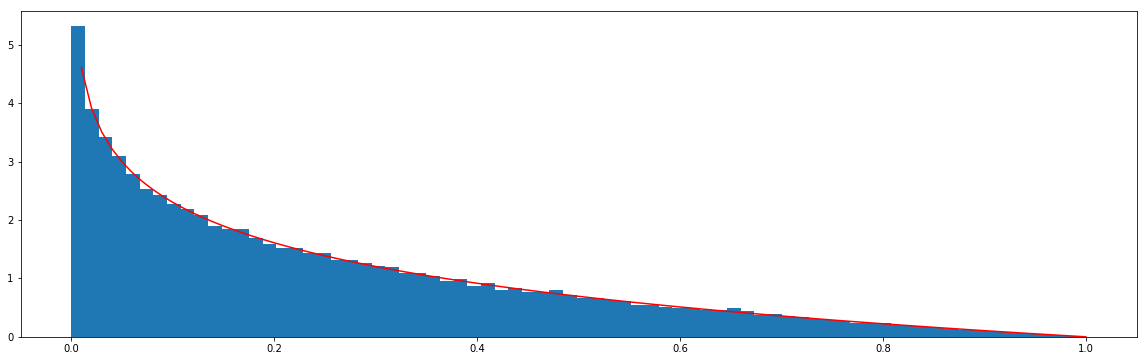

In [35]:
# Місце для Вашого коду
psi2_rvs=x_rvs*y_rvs
x=np.arange(0.01, 1+0.01, 0.01)
fig, axs=plt.subplots(1, 1, figsize=(20, 6))
axs.hist(psi2_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
y=-np.log(x)
axs.plot(x, y, 'r')

plt.show()



Знайдіть функцію щільності випадкової величини $\xi_3 = \min (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

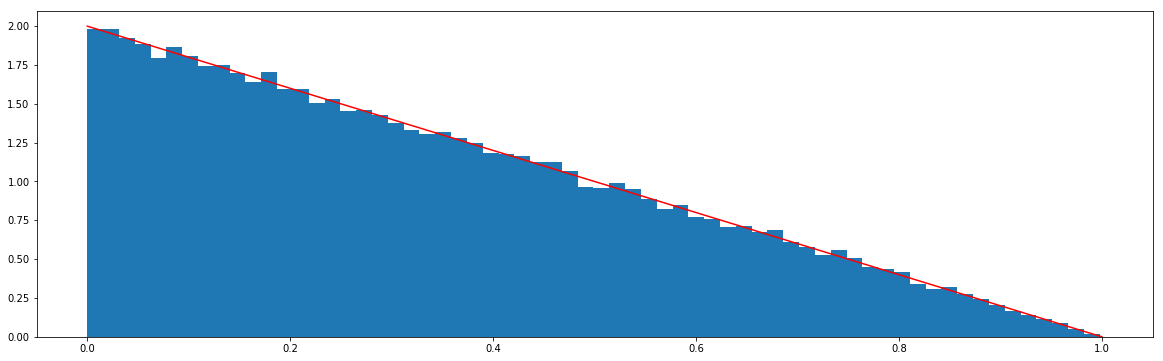

In [37]:
# Місце для Вашого коду
psi3_rvs=np.minimum(x_rvs, y_rvs)
fig, axs=plt.subplots(1, 1, figsize=(20, 6))
axs.hist(psi3_rvs, normed=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
x=np.arange(0, 1+0.01, 0.01)
y=2-2*x
axs.plot(x, y, 'r')

plt.show()
